<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-05 14:04:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.3’

survey-results-publ 100%[===================>] 201.62M  46.5MB/s    in 4.3s    

2025-01-05 14:04:52 (47.3 MB/s) - ‘survey-results-public.sqlite.3’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 94.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.3 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 112.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 14.7 MB/s eta 0:00:00


In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


In [36]:
QUERY = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


      YearsCodePro
0             None
1               17
2               27
3             None
4             None
...            ...
65432            3
65433         None
65434            5
65435            2
65436         None

[65437 rows x 1 columns]


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


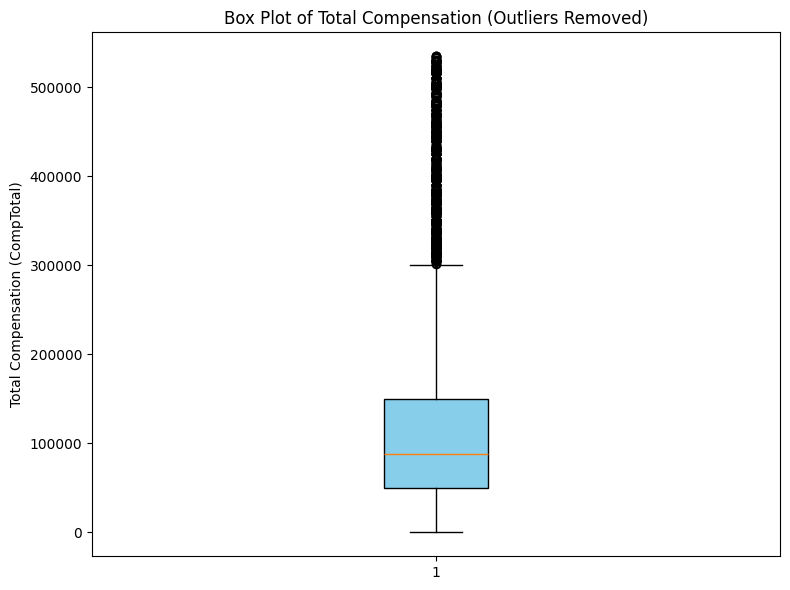

In [9]:
# your code goes here

# Query the data
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Drop rows with invalid or missing values
df = df.dropna(subset=['CompTotal'])

# Remove outliers using IQR
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Plot the box plot without outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['CompTotal'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"))

# Add labels and title
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation (Outliers Removed)')

# Show the plot
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [ ]:
cursor = conn.cursor()

# Step 1: Add a new REAL column
cursor.execute("ALTER TABLE main ADD COLUMN Age_Real REAL;")

# Step 2: Update the new column with numeric values
cursor.execute("""
UPDATE main
SET Age_Real = 
    CASE 
        WHEN Age = '18-24 years old' THEN 21.0
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70.0
        WHEN Age = 'Prefer not to say' THEN NULL
        WHEN Age = 'Under 18 years old' THEN 16.0
    END;
""")

# Commit changes and close the connection
conn.commit()

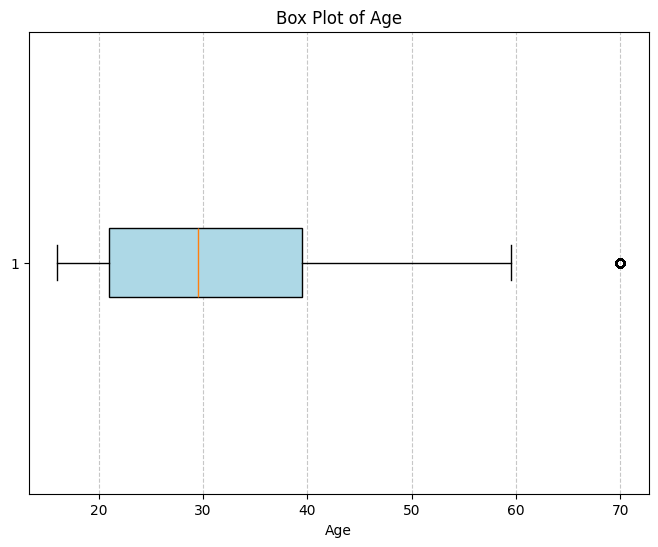

In [11]:
query = "SELECT Age_Real FROM main"  
df = pd.read_sql_query(query, conn)


# Clean data: Drop rows with missing or null values
data_cleaned = df['Age_Real'].dropna()

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_83/1206230330.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df.groupby('Age', group_keys=False).apply(remove_outliers)


<Figure size 1200x800 with 0 Axes>

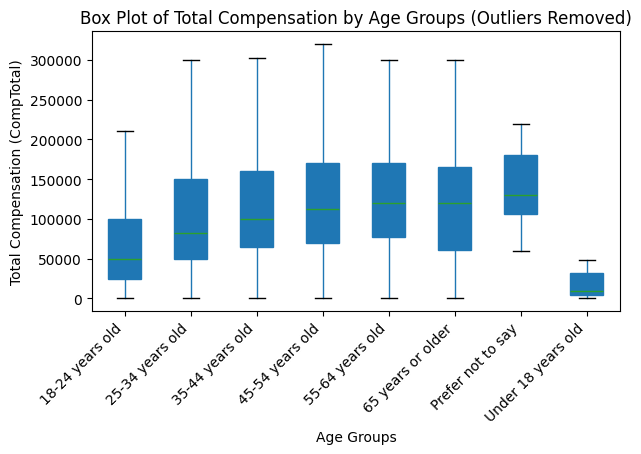

In [12]:
# your code goes here

# Query the data
query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
# Drop rows with missing or invalid values
df = df.dropna(subset=['CompTotal', 'Age'])

# Remove outliers using IQR for each age group
def remove_outliers(group):
    Q1 = group['CompTotal'].quantile(0.25)
    Q3 = group['CompTotal'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['CompTotal'] >= lower_bound) & (group['CompTotal'] <= upper_bound)]

df_cleaned = df.groupby('Age', group_keys=False).apply(remove_outliers)

# Plot the cleaned box plot
plt.figure(figsize=(12, 8))
df_cleaned.boxplot(column='CompTotal', by='Age', grid=False, showfliers=False, patch_artist=True)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Groups')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation by Age Groups (Outliers Removed)')
plt.suptitle('')  # Remove default title added by pandas
plt.tight_layout()

# Show the plot
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

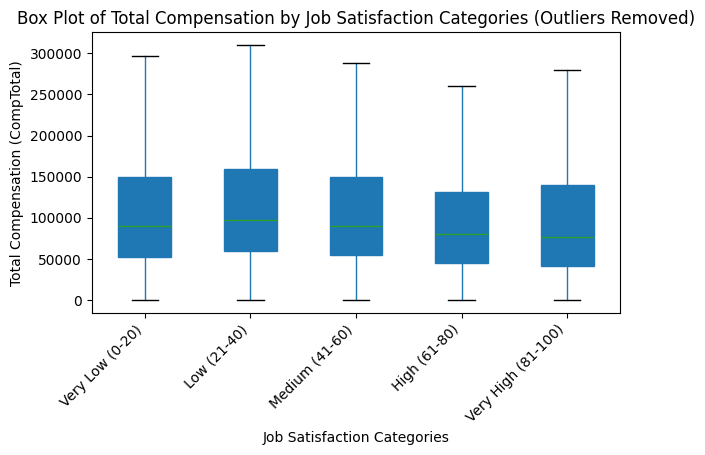

In [20]:

query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Drop rows with invalid or missing values
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Create bins for JobSatPoints_6
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low (0-20)', 'Low (21-40)', 'Medium (41-60)', 'High (61-80)', 'Very High (81-100)']
df['SatisfactionCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Remove outliers from the entire `CompTotal` column using IQR
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='CompTotal', by='SatisfactionCategory', grid=False, showfliers=False, patch_artist=True)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Satisfaction Categories')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation by Job Satisfaction Categories (Outliers Removed)')
plt.suptitle('')  # Remove the default title added by pandas
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x1000 with 0 Axes>

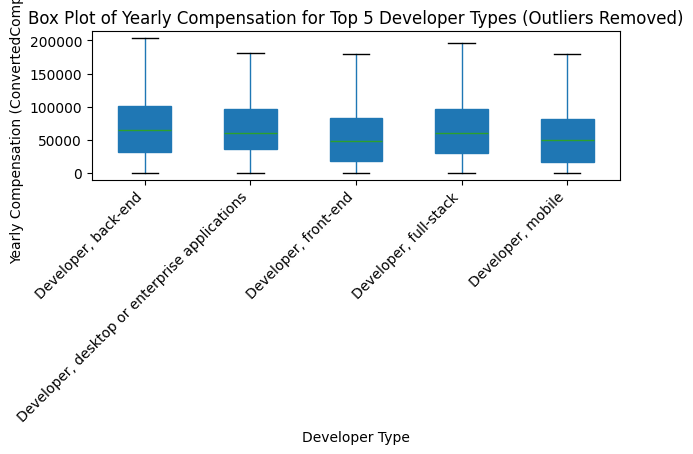

In [28]:

# Query the data
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Drop rows with invalid or missing values
df = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# Identify the top 5 most common developer types
top_5_dev_types = df['DevType'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 developer types
df_top_5 = df[df['DevType'].isin(top_5_dev_types)]

# Remove outliers from `ConvertedCompYearly` using IQR
Q1 = df_top_5['ConvertedCompYearly'].quantile(0.25)
Q3 = df_top_5['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_top_5_cleaned = df_top_5[
    (df_top_5['ConvertedCompYearly'] >= lower_bound) &
    (df_top_5['ConvertedCompYearly'] <= upper_bound)
]

# Plot the box plot
plt.figure(figsize=(10, 10))
df_top_5_cleaned.boxplot(
    column='ConvertedCompYearly',
    by='DevType',
    grid=False,
    showfliers=False,
    patch_artist=True
)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.title('Box Plot of Yearly Compensation for Top 5 Developer Types (Outliers Removed)')
plt.suptitle('')  # Remove the default title added by pandas
plt.tight_layout()

# Show the plot
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x600 with 0 Axes>

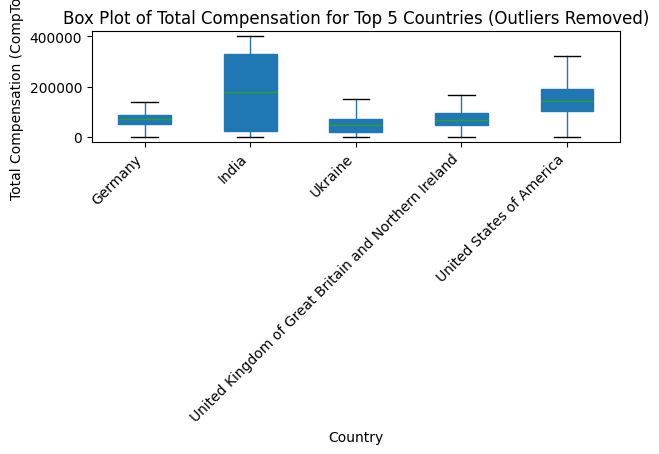

In [29]:

# Query the data
query = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Drop rows with invalid or missing values
df = df.dropna(subset=['CompTotal', 'Country'])

# Identify the top 5 countries with the highest number of respondents
top_5_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 countries
df_top_5_countries = df[df['Country'].isin(top_5_countries)]

# Remove outliers from `CompTotal` using IQR
Q1 = df_top_5_countries['CompTotal'].quantile(0.25)
Q3 = df_top_5_countries['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_top_5_countries_cleaned = df_top_5_countries[
    (df_top_5_countries['CompTotal'] >= lower_bound) &
    (df_top_5_countries['CompTotal'] <= upper_bound)
]

# Plot the box plot
plt.figure(figsize=(10, 6))
df_top_5_countries_cleaned.boxplot(
    column='CompTotal',
    by='Country',
    grid=False,
    showfliers=False,
    patch_artist=True
)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation for Top 5 Countries (Outliers Removed)')
plt.suptitle('')  # Remove the default title added by pandas
plt.tight_layout()

# Show the plot
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1000x600 with 0 Axes>

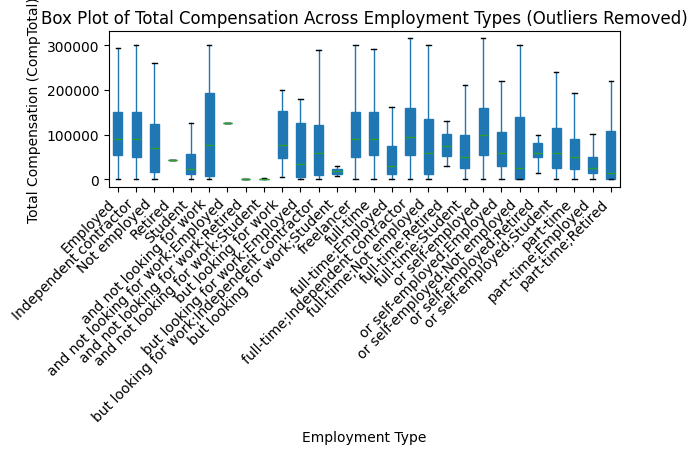

In [34]:

# Query the data
query = """
SELECT Employment, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Drop rows with invalid or missing values
df = df.dropna(subset=['CompTotal', 'Employment'])

# Split multiple `EmploymentType` values and expand them into separate rows
df = df.assign(Employment=df['Employment'].str.split(',')).explode('Employment')

# Clean the `EmploymentType` values (strip any leading/trailing whitespace)
df['Employment'] = df['Employment'].str.strip()

# Remove outliers from `CompTotal` using IQR
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(
    column='CompTotal',
    by='Employment',
    grid=False,
    showfliers=False,
    patch_artist=True
)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (CompTotal)')
plt.title('Box Plot of Total Compensation Across Employment Types (Outliers Removed)')
plt.suptitle('')  # Remove the default title added by pandas
plt.tight_layout()

# Show the plot
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

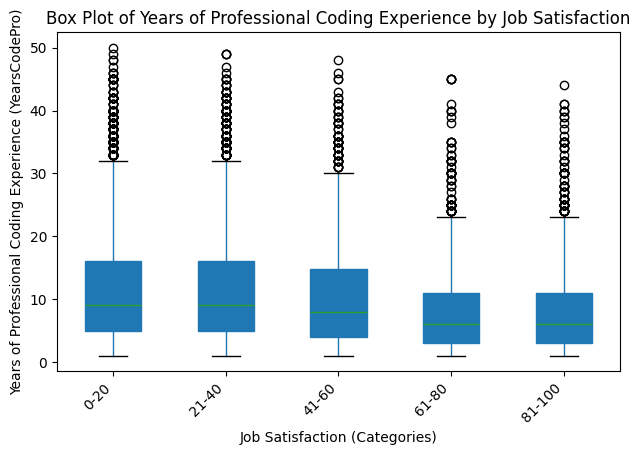

In [37]:

# Query the data
query = """
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert `YearsCodePro` and `JobSatPoints_6` to numeric, coercing errors to NaN if conversion fails
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with invalid or missing values
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Create job satisfaction categories (e.g., 0-20, 21-40, ..., 81-100)
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=True)

# Plot the box plot with categorized job satisfaction
plt.figure(figsize=(10, 6))
df.boxplot(
    column='YearsCodePro',
    by='JobSatCategory',
    grid=False,
    patch_artist=True
)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Satisfaction (Categories)')
plt.ylabel('Years of Professional Coding Experience (YearsCodePro)')
plt.title('Box Plot of Years of Professional Coding Experience by Job Satisfaction')
plt.suptitle('')  # Remove the default title added by pandas
plt.tight_layout()

# Show the plot
plt.show()



### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [38]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
